# In-Depth Analysis/Machine Learning

## Capstone Project 3: Predicting House prices in Seattle


-

In the **Pre-processing part** we already determine which features will be used to create the Model. We need to select a way to measure the reult and regression problems use certain evaluation metrics such as mean squared error (MSE).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from termcolor import colored
from termcolor import colored as cl
import scipy.stats as stats
from scipy.stats import uniform, loguniform
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, \
    GridSearchCV, RandomizedSearchCV, KFold
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/apartment&house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3441 non-null   int64  
 1   Unnamed: 0.1               3441 non-null   int64  
 2   id                         3441 non-null   int64  
 3   latitude                   3441 non-null   float64
 4   longitude                  3441 non-null   float64
 5   zipcode                    3441 non-null   int64  
 6   property_type              3441 non-null   object 
 7   room_type                  3441 non-null   object 
 8   price                      3441 non-null   float64
 9   accommodates               3441 non-null   int64  
 10  cleaning_fee               3441 non-null   float64
 11  availability_30            3441 non-null   int64  
 12  bathrooms                  3441 non-null   float64
 13  bedrooms                   3441 non-null   float

In [3]:
df = df.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1', 'room_type'])
df.head()

,id,latitude,longitude,zipcode,property_type,price,accommodates,cleaning_fee,availability_30,bathrooms,bedrooms,review_scores_rating,review_scores_cleanliness,distance,cleaning_fee_class
0,241032,47.636289,-122.371025,98119,Apartment,85.0,4,0.0,14,1.0,1.0,95.0,10.0,0.000000,0
1,953595,47.639123,-122.365666,98119,Apartment,150.0,4,40.0,13,1.0,1.0,96.0,10.0,7.862178,1
2,3308979,47.629724,-122.369483,98119,House,975.0,11,300.0,1,4.5,5.0,97.0,10.0,14.664675,1
3,7421966,47.638473,-122.369279,98119,Apartment,100.0,3,0.0,0,1.0,0.0,0.0,0.0,14.318637,0
4,278830,47.632918,-122.372471,98119,House,450.0,6,125.0,30,2.0,3.0,92.0,9.0,16.260640,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3441 non-null   int64  
 1   latitude                   3441 non-null   float64
 2   longitude                  3441 non-null   float64
 3   zipcode                    3441 non-null   int64  
 4   property_type              3441 non-null   object 
 5   price                      3441 non-null   float64
 6   accommodates               3441 non-null   int64  
 7   cleaning_fee               3441 non-null   float64
 8   availability_30            3441 non-null   int64  
 9   bathrooms                  3441 non-null   float64
 10  bedrooms                   3441 non-null   float64
 11  review_scores_rating       3441 non-null   float64
 12  review_scores_cleanliness  3441 non-null   float64
 13  distance                   3441 non-null   float

In [5]:
df = pd.get_dummies(df, columns= ['zipcode', 'property_type'])

### Split to train and test data

Let scale the data with Standard Scale to better model performance. Before the split, the data by train and test sets. 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
columns = df.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns= columns)
df_scaled.head()

,id,latitude,longitude,price,accommodates,cleaning_fee,availability_30,bathrooms,bedrooms,review_scores_rating,...,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,property_type_Apartment,property_type_House
0,-1.761858,0.155882,-1.206895,-0.477932,0.312765,-0.908448,-0.219693,-0.432916,-0.357990,0.447528,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
1,-1.521151,0.221666,-1.037351,0.250004,0.312765,-0.114526,-0.301863,-0.432916,-0.357990,0.475920,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
2,-0.725493,0.003500,-1.158107,9.489186,3.826562,5.045969,-1.287905,5.788835,4.093120,0.504313,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,-0.992761,0.992761
3,0.663890,0.206580,-1.151651,-0.309947,-0.189206,-0.908448,-1.370075,-0.432916,-1.470768,-2.249745,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
4,-1.749090,0.077644,-1.252627,3.609706,1.316707,1.572559,1.095028,1.344727,1.867565,0.362351,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,-0.992761,0.992761


In [8]:
df_scaled.columns

Index(['id', 'latitude', 'longitude', 'price', 'accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X = df_scaled[['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House']].values
y = df_scaled['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [10]:
def calculate_residual_percentile(pred, actual, percentile):
    """Calculate percentile bounds of positive and negative residuals"""
    import numpy as np
    resid = actual - pred
    
    #Create Positive and Negative Condition Arrays
    condition_pos = resid > 0
    condition_neg = resid < 0
    
    #Create arrays for positive and negative residuals
    pos_residuals = np.extract(condition_pos, resid)
    neg_residuals = np.extract(condition_neg, resid)
    
    #Calculate Percentile
    pos_percentile = np.percentile(pos_residuals, percentile)
    neg_percentile = np.percentile(neg_residuals, 100-percentile)
    pos_percentile = round(pos_percentile,4)
    neg_percentile = round(neg_percentile,4)
    return neg_percentile, pos_percentile
 

# Modeling

The data was split into train, validation, and test sets, as I plan to use the validation set for hyperparameter tuning. 

First I will run a linear regression, random forest, and gradient boosting model with the defaults and no tuning to get some baseline scores.

#### Evaluate performance based on the following metrics:

- Mean Absolute Error (MAE): represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

- Root Mean Squared Error (RMSE): is the error rate by the square root of MSE.

- R-squared (Coefficient of determination): The coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.



**Linear regression** algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable

**Random Forest** can be used as both classification and random forest regression algorithm. The RF algorithm is an algorithm for machine learning, which is a forest. We know the forest consists of a number of trees. Creates a random sample of multiple decision trees and merges them together to obtain a more stable and accurate prediction through cross validation. The more trees in the forest, the more robust would be the prediction and thus higher accuracy.

## Linear Regression

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [12]:
lr_predictions = lr.predict(X_test)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_mae = np.mean(abs(lr_predictions - y_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print('Base Linear Regression Train Score:      ', lr_train_score)
print('Base Linear Regression Test Score:       ', lr_test_score)
print('Base Linear Regression MAE:              ',lr_mae)
print('Base Linear Regression RMSE:             ',lr_rmse)

Base Linear Regression Train Score:       0.5587420357408808
Base Linear Regression Test Score:        0.6353172676768554
Base Linear Regression MAE:               0.38119735196598753
Base Linear Regression RMSE:              0.5449226464045437


The Linear Regression has a Test score of 0.64. This score is weak but is still capable of solving a real problem.

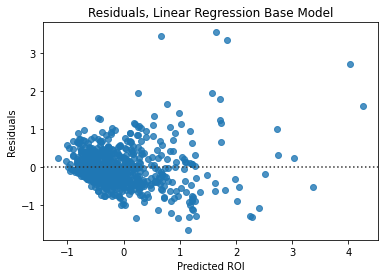

In [13]:
sns.residplot(x = lr_predictions, y = y_test - lr_predictions)
plt.title('Residuals, Linear Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

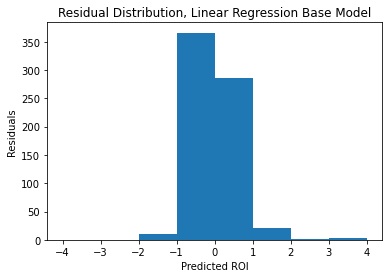

In [14]:
plt.hist(y_test - lr_predictions, bins = np.arange(-4, 5))
plt.title('Residual Distribution, Linear Regression Base Model', size= 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [15]:
lr_90_percentile = calculate_residual_percentile(lr_predictions, y_test ,90)
print('Base Linear Regression Residuals, 90th percentile: ', lr_90_percentile)

Base Linear Regression Residuals, 90th percentile:  (-0.7155, 0.9062)


The residuals are centered bellow zero and have a long tail towards the positive side.

## Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique.

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, n_estimators = 100, random_state = 46, oob_score = True)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=46)

In [17]:
rf_prediction = rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
rf_mae = np.mean(abs(rf_prediction - y_test))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_prediction))

In [18]:
print('Base Random Forest Train Score:      ', rf_train_score)
print('Base Random Forest Test Score:       ', rf_test_score)
print('Base Random Forest MAE:              ', rf_mae)
print('Base Random Forest RMSE:             ', rf_rmse)

Base Random Forest Train Score:       0.9331316271748149
Base Random Forest Test Score:        0.6112224979087664
Base Random Forest MAE:               0.36554343573788406
Base Random Forest RMSE:              0.5626363922572384


The random forest model has a Test score of 0.61. This score is weak meaning we need to look how to improve the score.

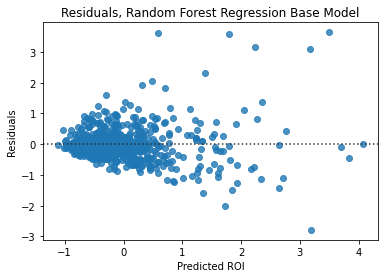

In [19]:
sns.residplot(x = rf_prediction, y = y_test - rf_prediction)
plt.title('Residuals, Random Forest Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

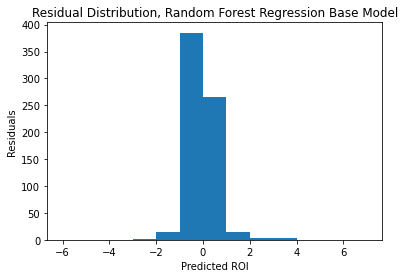

In [20]:
plt.hist(y_test - rf_prediction, bins = np.arange(-6, 8))
plt.title('Residual Distribution, Random Forest Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [21]:
rf_90_percentile = calculate_residual_percentile(rf_prediction, y_test ,90)
print('Base Random Forest Residuals, 90th percentile: ', rf_90_percentile)

Base Random Forest Residuals, 90th percentile:  (-0.7313, 0.8831)


The residuals are centered just below zero, indicating prices with where the model over-estimating the low ROI. 90 Percent of the residuals are between 0.73 and 0.88 ROI.

## Gradient Boosting

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

The algorithm provides hyperparameters that should be tuned for a specific dataset.

- The number of trees or estimators in the model.
- The learning rate of the model.
- The row and column sampling rate for stochastic models.
- The maximum tree depth.
- The minimum tree weight.
- The regularization terms alpha and lambda.



In [22]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(random_state = 46)
boost.fit(X_train, y_train)

GradientBoostingRegressor(random_state=46)

In [23]:
boost_predictions = boost.predict(X_test)
boost_train_score = boost.score(X_train, y_train)
boost_test_score = boost.score(X_test, y_test)
boost_mae = np.mean(abs(boost_predictions - y_test))
boost_rmse = np.sqrt(mean_squared_error(y_test, boost_predictions))

print('Base Gradient Boost Train Score:     ', boost_train_score)
print('Base Gradient Boost Test Score:      ', boost_test_score)
print('Base Gradient Boost MAE:             ', boost_mae)
print('Base Gradient Boost RSME:            ',boost_rmse)

Base Gradient Boost Train Score:      0.7086491885913448
Base Gradient Boost Test Score:       0.66240288765792
Base Gradient Boost MAE:              0.34621194715445747
Base Gradient Boost RSME:             0.524296089716817


The Gradient Boosting has a much better test score of 0.66 compared to the Lineal Rigression which scored 0.60.

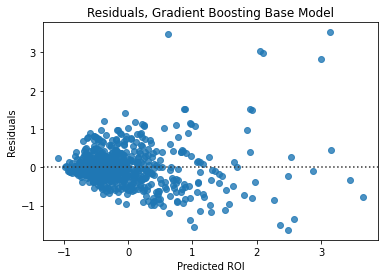

In [24]:
sns.residplot(x = boost_predictions, y = y_test - boost_predictions)
plt.title('Residuals, Gradient Boosting Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

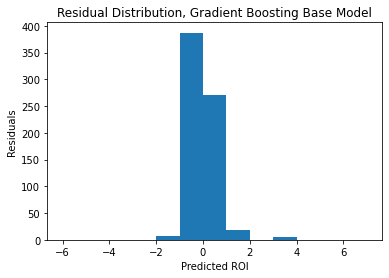

In [25]:
plt.hist(y_test - boost_predictions, bins = np.arange(-6, 8))
plt.title('Residual Distribution, Gradient Boosting Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [26]:
rf_90_percentile = calculate_residual_percentile(boost_predictions, y_test ,90)
print('Base Random Forest Residuals, 90th percentile: ', rf_90_percentile)

Base Random Forest Residuals, 90th percentile:  (-0.62, 0.8767)


The residuals are centered bellow zero and have a long tail towards the positive side.

## Extreme Gradient Boosting

Unlike Gradient Boost, XGBoost makes use of regularization parameters that helps against overfitting.

In [27]:
from xgboost import XGBRegressor

In [28]:
xgb  = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
xgb_predictions = xgb.predict(X_test)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)
xgb_mae = np.mean(abs(xgb_predictions - y_test))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

In [30]:
print('Base XGB Train Score:     ', xgb_train_score)
print('Base XGB Test Score:      ', xgb_test_score)
print('Base XGB MAE:             ', xgb_mae)
print('Base XGB RSME:            ', xgb_rmse)

Base XGB Train Score:      0.9658579716388738
Base XGB Test Score:       0.49723810185904627
Base XGB MAE:              0.4004307329387873
Base XGB RSME:             0.6398209196139503


# Base Model Summary

In [31]:
print('Base Linear Regression:')
print('Base Linear Regression Train Score:  ', lr_train_score)
print('Base Linear Regression Test Score:   ', lr_test_score)
print('Base Linear Regression MAE:          ',lr_mae)
print('Base Linear Regression RMSE:         ',lr_rmse)
print('-'*71)
print('Base Random Forest: ')
print('Base Random Forest Train Score:      ', rf_train_score)
print('Base Random Forest Test Score:       ', rf_test_score)
print('Base Random Forest MAE:              ', rf_mae)
print('Base Random Forest RMSE:             ', rf_rmse)
print('-'*71)
print('Base Gradient Boost:')
print('Base Gradient Boost Train Score:     ', boost_train_score)
print('Base Gradient Boost Test Score:      ', boost_test_score)
print('Base Gradient Boost MAE:             ', boost_mae)
print('Base Gradient Boost RMSE:            ',boost_rmse)
print('-'*71)
print('Base Extreme Gradient Boost:')
print('Base XGB Train Score:                ', xgb_train_score)
print('Base XGB Test Score:                 ', xgb_test_score)
print('Base XGB MAE:                        ', xgb_mae)
print('Base XGB RMSE:                       ', xgb_rmse)

Base Linear Regression:
Base Linear Regression Train Score:   0.5587420357408808
Base Linear Regression Test Score:    0.6353172676768554
Base Linear Regression MAE:           0.38119735196598753
Base Linear Regression RMSE:          0.5449226464045437
-----------------------------------------------------------------------
Base Random Forest: 
Base Random Forest Train Score:       0.9331316271748149
Base Random Forest Test Score:        0.6112224979087664
Base Random Forest MAE:               0.36554343573788406
Base Random Forest RMSE:              0.5626363922572384
-----------------------------------------------------------------------
Base Gradient Boost:
Base Gradient Boost Train Score:      0.7086491885913448
Base Gradient Boost Test Score:       0.66240288765792
Base Gradient Boost MAE:              0.34621194715445747
Base Gradient Boost RMSE:             0.524296089716817
-----------------------------------------------------------------------
Base Extreme Gradient Boost:
Base 

The best model performing is the Linear Regression model have the lowest MAE(36%), RMSE(57%) and the highest test score with 66.8%. 

# Model Tuning

Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. This is accomplished by selecting appropriate “hyperparameters.”
I will try to increase the score of every model and at the end select the best prediction score.

In [32]:
kfolds = KFold(n_splits=10, shuffle=True)

## Linear Regression Tuning

I will attempt to fit a ridge and lasso model to see if the results are improved. Based on the low score on the training set, it most likely underfitting.

In [33]:
from sklearn.linear_model import Ridge

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    
    ridge = Ridge(alpha = alpha, fit_intercept = True, random_state = 0)
    ridge.fit(X_train, y_train)
    train_error = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    test_error = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    print('alpha: {:7} | train error: {:5} | val error: {:6}'.
          format(alpha,
                 round(train_error,10),
                 round(test_error,10)))

alpha:   1e-06 | train error: 0.6792765962 | val error: 0.544913637
alpha:   1e-05 | train error: 0.6792765962 | val error: 0.5449136371
alpha:  0.0001 | train error: 0.6792765962 | val error: 0.5449136378
alpha:   0.001 | train error: 0.6792765962 | val error: 0.5449136454
alpha:    0.01 | train error: 0.6792765962 | val error: 0.5449137208
alpha:     0.1 | train error: 0.6792765963 | val error: 0.5449144749
alpha:       1 | train error: 0.6792766133 | val error: 0.5449220249
alpha:      10 | train error: 0.6792782949 | val error: 0.5449984132
alpha:     100 | train error: 0.6794316982 | val error: 0.5458617309


In [34]:
ridge = Ridge(alpha = .000001)
ridge.fit(X_train, y_train)

Ridge(alpha=1e-06)

In [35]:
from sklearn.linear_model import Lasso

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    
    lasso = Lasso(alpha = alpha, fit_intercept = True, random_state = 1)
    lasso.fit(X_train, y_train)
    new_train_error = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    new_validation_error = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    print('alpha: {:7} | train error: {:5} | val error: {:6}'.
          format(alpha,
                 round(new_train_error,10),
                 round(new_validation_error,10)))

alpha:   1e-05 | train error: 0.6792765989 | val error: 0.5449127752
alpha:  0.0001 | train error: 0.6792768697 | val error: 0.5449056524
alpha:   0.001 | train error: 0.6793031121 | val error: 0.5448551907
alpha:    0.01 | train error: 0.6814402336 | val error: 0.5471033375
alpha:     0.1 | train error: 0.7275687032 | val error: 0.5962911414
alpha:       1 | train error: 1.0225876003 | val error: 0.9046240929
alpha:      10 | train error: 1.0225876003 | val error: 0.9046240929


In [36]:
lasso = Lasso(alpha = .001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)


print('Base Linear Regression Train Score:      ', lr.score(X_train, y_train))
print('Base Linear Regression Test Score:       ', lr.score(X_test, y_test))
print('-'*72)
print('Ridge Regression Train Score:            ', ridge.score(X_train, y_train))
print('Ridge Regression Test Score:             ', ridge.score(X_test, y_test))
print('-'*72)
print('Lasso Regression Train Score:            ', lasso_train_score)
print('Lasso Regression Test Score:             ', lasso_test_score)

Base Linear Regression Train Score:       0.5587420357408808
Base Linear Regression Test Score:        0.6353172676768554
------------------------------------------------------------------------
Ridge Regression Train Score:             0.5587423387812024
Ridge Regression Test Score:              0.635329326432515
------------------------------------------------------------------------
Lasso Regression Train Score:             0.5587078886026702
Lasso Regression Test Score:              0.6354075498646791


The lasso regularization is with an alpha value of 0.001 is performing the best on the Test data, however, the change is minimal. The Linear regression only has a very slight improvement.

In [38]:
lasso_predictions = lasso.predict(X_test)
lasso_mae = np.mean(abs(lasso_predictions - y_test))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print('Base Linear Regression MAE:   ',lr_mae)
print('Base Linear Regression RMSE:  ',lr_rmse)
print('Lasso Regresson MAE:          ',lasso_mae)
print('Lasso Regression RSME:        ', lasso_rmse)


Base Linear Regression MAE:    0.38119735196598753
Base Linear Regression RMSE:   0.5449226464045437
Lasso Regresson MAE:           0.380919396256426
Lasso Regression RSME:         0.5448551907100952


The Lasso model also shows a minimal improvement on the MAE and RMSE metrics.

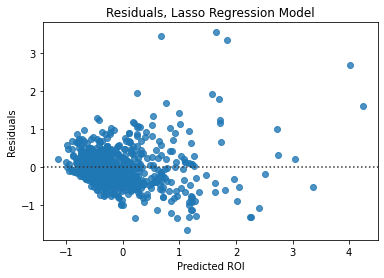

In [39]:
sns.residplot(x = lasso_predictions, y = y_test - lasso_predictions)
plt.title('Residuals, Lasso Regression Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

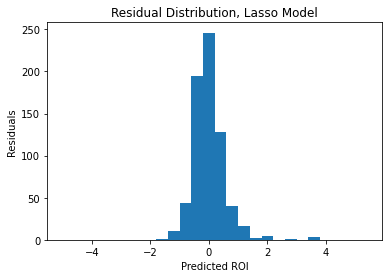

In [40]:
plt.hist(y_test - lasso_predictions, bins = np.arange(-5, 5.5, 0.4))
plt.title('Residual Distribution, Lasso Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [41]:
lasso_90_percentile = calculate_residual_percentile(lasso_predictions, y_test ,90)
print('Lasso Residuals, 90th percentile: ', lasso_90_percentile)

Lasso Residuals, 90th percentile:  (-0.7146, 0.9128)


As with the base model, the residuals are still centered above zero, and the negative residuals have a heavy tail. 

## Random Forest Tuning

To tune the Random Forest, I have to evaluate each feature's importance for the Random Forest model.

In [42]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = ['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House'], columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances.head(40))

                             importance
bedrooms                   4.039789e-01
cleaning_fee               1.101157e-01
bathrooms                  8.487523e-02
distance                   7.975140e-02
accommodates               5.703209e-02
availability_30            5.624753e-02
review_scores_rating       3.896835e-02
review_scores_cleanliness  1.741861e-02
cleaning_fee_class         1.487349e-02
zipcode_98109              1.303635e-02
property_type_House        1.290391e-02
zipcode_98121              1.200862e-02
zipcode_98101              1.031940e-02
zipcode_98115              8.812736e-03
zipcode_98119              8.622640e-03
zipcode_98112              8.252997e-03
zipcode_98199              7.525929e-03
zipcode_98122              6.794477e-03
zipcode_98102              5.746543e-03
property_type_Apartment    5.586276e-03
zipcode_98104              5.090062e-03
zipcode_98105              4.835652e-03
zipcode_98107              4.098632e-03
zipcode_98103              3.692961e-03


In [43]:
X_2 = df_scaled[['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98177', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House']].values
y_2 = df_scaled['price'].values

In [44]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.25, random_state = 46)

Cutting the bathroom feature makes the Random Forest decrease the scoring metrics to 63%.

In [69]:
rf_3 = RandomForestRegressor(random_state= 46)

n_estimators= [100, 1000,]
max_features= [ 'sqrt', 'log2']
max_depth= [20,30,40]
max_depth.append(None)
min_samples_split= [5, 10, 15,]
min_samples_leaf= [1, 2, 5]

In [70]:
grid_param =  { 'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf    }

In [71]:
rfr= RandomForestRegressor(random_state= 46)
rfr_random = RandomizedSearchCV(estimator= rfr,
                                param_distributions= grid_param,
                                cv= 5,
                                random_state= 46,
                                n_jobs= -1)

In [72]:
rfr_random.fit(X_2_train, y_2_train)
print(rfr_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [88]:
rf_2 = RandomForestRegressor(n_jobs = -1, n_estimators = 100, min_samples_split= 5, max_features= 'sqrt', min_samples_leaf= 1, max_depth= 30, random_state = 46)

rf_2.fit(X_2_train, y_2_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_jobs=-1, random_state=46)

In [89]:
rf_2_predictions = rf_2.predict(X_2_test)
rf_2_train_score = rf_2.score(X_2_train, y_2_train)
rf_2_test_score = rf_2.score(X_2_test, y_2_test)
rf_2_mae = np.mean(abs(rf_2_predictions - y_2_test))
rf_2_rmse = np.sqrt(mean_squared_error(y_2_test, rf_2_predictions))

print('Base Random Forest:')
print(' Train Score:      ', rf_train_score)
print(' Test Score:       ', rf_test_score)
print(' MAE:              ', rf_mae)
print(' RMSE:             ', rf_rmse)
print('Reduced Dimension Random Forest:')
print(' Train Score:      ', rf_2_train_score)
print(' Test Score:       ', rf_2_test_score)
print(' MAE:              ',rf_2_mae)
print(' RMSE:             ',rf_2_rmse)

Base Random Forest:
 Train Score:       0.9331316271748149
 Test Score:        0.6112224979087664
 MAE:               0.36554343573788406
 RMSE:              0.5626363922572384
Reduced Dimension Random Forest:
 Train Score:       0.8447644349944543
 Test Score:        0.6289296379168088
 MAE:               0.36080901076721733
 RMSE:              0.5402229770430581


#### Gradient Boost Tuning

To tune the gradient boost model, I will set up a parameter grid and do a grid search to determine which parameters yield the highest score on the validation set. Next, search over the max_depth, learning_rate, min_samples_leaf, and max_features hyperparameters, all with an increased n_estimators parameter of 1000.

In [51]:
from sklearn.model_selection import ParameterGrid

param_grid = {'learning_rate' : [0.1, 0.01, 0.02, 0.05, 0.005], #default 0.1
              'min_samples_leaf' : [1,2,3,4], #default 1
              'max_features' : [1, 0.5, 0.05, 0.005]} #default none (all)

boost_2 = GradientBoostingRegressor(n_estimators = 100, random_state = 46)

In [52]:
scores = []
best_score = 0
best_param = {}

for p in ParameterGrid(param_grid):
    boost_2.set_params(**p)
    boost_2.fit(X_train, y_train)
    score = boost_2.score(X_test, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_param = p

In [53]:
print(best_param)
print(best_score)

{'learning_rate': 0.1, 'max_features': 0.5, 'min_samples_leaf': 3}
0.6711513521472816


The best scoring was found with a learning rate of 0.1, max features of 0.5, and minimum samples leaf of 3.

In [54]:
boost_2 = GradientBoostingRegressor(learning_rate = 0.1,
                                        max_features = 0.5,
                                        min_samples_leaf = 3,
                                        random_state = 46)
boost_2.fit(X_train, y_train)

GradientBoostingRegressor(max_features=0.5, min_samples_leaf=3, random_state=46)

In [55]:
boost_2_predictions = boost_2.predict(X_test)
boost_2_train_score = boost_2.score(X_train, y_train)
boost_2_test_score = boost_2.score(X_test, y_test)
boost_2_mae = np.mean(abs(boost_2_predictions - y_test))
boost_2_rmse = np.sqrt(mean_squared_error(y_test, boost_2_predictions))
print('Base Gradient Boost:')
print(' Train Score:      ', boost_train_score)
print(' Test Score:       ', boost_test_score)
print(' MAE:              ', boost_mae)
print(' RSME:             ', boost_rmse)
print('-'*72)
print('Tuned Gradient Boost:')
print(' Train Score:      ', boost_2_train_score)
print(' Test Score:       ', boost_2_test_score)
print(' MAE:              ', boost_2_mae)
print(' RSME:             ', boost_2_rmse)

Base Gradient Boost:
 Train Score:       0.7086491885913448
 Test Score:        0.66240288765792
 MAE:               0.34621194715445747
 RSME:              0.524296089716817
------------------------------------------------------------------------
Tuned Gradient Boost:
 Train Score:       0.6850350960243403
 Test Score:        0.6711513521472816
 MAE:               0.3446444452526125
 RSME:              0.5174582165155724


The Tuned Gradient Boost results in a minimal gain in the scoring metrics to 67%.

#### XGBRegression tuning

I will tune the XGBRegressor hyperparameter using Randomized Search CV and GridSearchCV to find the optimal parameters. 

In [56]:
import xgboost as xgb

In [57]:
gs = make_pipeline(RobustScaler(),
                   GridSearchCV(ElasticNet(max_iter=100000),
                                param_grid={'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                            'alpha': np.logspace(-4, -2, 9),
                                           },
                                scoring='neg_root_mean_squared_error',
                                refit=True,
                                cv=kfolds,
                                n_jobs=-1,
                                verbose=1
                               ))


In [58]:
gs.fit(X_train, y_train)
print('best params', gs._final_estimator.best_params_)
print('best score', -gs._final_estimator.best_score_)
l1_ratio = gs._final_estimator.best_params_['l1_ratio']
alpha = gs._final_estimator.best_params_['alpha']

Fitting 10 folds for each of 117 candidates, totalling 1170 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   12.5s
best params {'alpha': 0.0031622776601683794, 'l1_ratio': 0.99}
best score 0.6787543212223405
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:   17.7s finished


In [59]:
### XGBoost (GridSearchCV)

MEAN_RESPONSE=y_train.mean()
def cv_to_raw(cv_val, mean_response=MEAN_RESPONSE):
    """convert log1p rmse to underlying SalePrice error"""
    return np.expm1(mean_response+cv_val) - np.expm1(mean_response)
    
    
gs = make_pipeline(RobustScaler(),
                   GridSearchCV(ElasticNet(max_iter=100000),
                                param_grid={'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                            'alpha': np.logspace(-4, -2, 9),
                                           },
                                scoring='neg_root_mean_squared_error',
                                refit=True,
                                cv=kfolds,
                                n_jobs=-1,
                                verbose=1
                               ))

gs.fit(X_2_train, y_2_train)
print('best params', gs._final_estimator.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 10 folds for each of 117 candidates, totalling 1170 fits
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.5s
best params {'alpha': 0.01, 'l1_ratio': 0.3}
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:    7.1s finished


In [60]:
# RandomizedSearch
rs = make_pipeline(RobustScaler(),
                   RandomizedSearchCV(ElasticNet(max_iter=100000),
                                      {'alpha': loguniform(0.0001, 0.1),
                                       'l1_ratio': uniform(0.001, 0.5),
                                      },
                                      scoring='neg_root_mean_squared_error',
                                      refit=True,
                                      cv=kfolds,
                                      n_iter=200,
                                      n_jobs=-1,
                                      verbose=1,
                                     )
                  )

rs.fit(X_2_train, y_2_train)

print('best params', rs._final_estimator.best_params_)
print('best score', -rs._final_estimator.best_score_)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1869 tasks      | elapsed:    8.8s
best params {'alpha': 0.0035854045341994325, 'l1_ratio': 0.4803619688195409}
best score 0.6841745886093036
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    9.1s finished


**Let's compare the parameters results**

In [91]:
boost_4 = XGBRegressor(n_estimators = 1000, alpha= 0.05, learning_rate=0.005)
boost_4.fit(X_2_train, y_2_train)
boost_5 = XGBRegressor(n_estimators = 1000, alpha= 0.004, learning_rate=0.5)
boost_5.fit(X_2_train, y_2_train)

XGBRegressor(alpha=0.004, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.00400000019, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [92]:
boost_4_predictions = boost_4.predict(X_2_test)
boost_4_train_score = boost_4.score(X_2_train, y_2_train)
boost_4_test_score = boost_4.score(X_2_test, y_2_test)
boost_4_mae = np.mean(abs(boost_4_predictions - y_2_test))
boost_4_rmse = np.sqrt(mean_squared_error(y_2_test, boost_4_predictions))


boost_5_predictions = boost_5.predict(X_2_test)
boost_5_train_score = boost_5.score(X_2_train, y_2_train)
boost_5_test_score = boost_5.score(X_2_test, y_2_test)
boost_5_mae = np.mean(abs(boost_5_predictions - y_2_test))
boost_5_rmse = np.sqrt(mean_squared_error(y_2_test, boost_5_predictions))

print('Base Gradient Boost:')
print(' Train Score:      ', boost_train_score)
print(' Test Score:       ', boost_test_score)
print(' MAE:              ', boost_mae)
print(' RMSE:             ', boost_rmse)
print('-'*72)
print('Tune Gradient Boost-1:')
print(' Train Score:      ', boost_5_train_score)
print(' Test Score:       ', boost_5_test_score)
print(' MAE:              ', boost_5_mae)
print(' RMSE:             ', boost_5_rmse)
print('-'*72)
print('Tune Gradient Boost-2:')
print(' Train Score:      ', boost_4_train_score)
print(' Test Score:       ', boost_4_test_score)
print(' MAE:              ', boost_4_mae)
print(' RMSE:             ', boost_4_rmse)

Base Gradient Boost:
 Train Score:       0.7086491885913448
 Test Score:        0.66240288765792
 MAE:               0.34621194715445747
 RMSE:              0.524296089716817
------------------------------------------------------------------------
Tune Gradient Boost-1:
 Train Score:       0.9999877691070519
 Test Score:        0.337550036893112
 MAE:               0.45488842188758005
 RMSE:              0.7218076124783614
------------------------------------------------------------------------
Tune Gradient Boost-2:
 Train Score:       0.8365035105344153
 Test Score:        0.5834721339302091
 MAE:               0.3764463938164171
 RMSE:              0.5723569339746986


I was tuning the XBGRegression and the score decrease compared to the baseline.

## Model Selection

After produced many iterations of performance tuning to find the optimal solution of each model. Random Forest Regression, XGBoost, Gradient Boost Regression, and XGBoost were tuned by function GridSearchCV provided by scikit-learn to produce the following results listed.

In [63]:
print('      Models                  Test score')
print('Lasso Regression Test Score:  ', round(lasso_test_score, 4))
print('Random Forest Test Score:     ', round(rf_2_test_score, 4)) 
print('Gradient Boost:               ', round(boost_2_test_score,4))
print('XGBoot regression:            ', round(boost_4_test_score,4))

      Models                  Test score
Lasso Regression Test Score:   0.6354
Random Forest Test Score:      0.5743
Gradient Boost:                0.6712
XGBoot regression:             0.5835


In [64]:
print('      Models                  RMSE score')
print('Lasso Regression Test Score:  ', round(lasso_rmse, 4))
print('Random Forest Test Score:     ', round(rf_2_rmse, 4)) 
print('Gradient Boost:               ', round(boost_2_rmse, 4))
print('XGBoot regression:            ', round(boost_4_rmse,4))

      Models                  RMSE score
Lasso Regression Test Score:   0.5449
Random Forest Test Score:      0.5786
Gradient Boost:                0.5175
XGBoot regression:             0.5724


In [65]:
print('      Models                  MAE score')
print('Lasso Regression Test Score:  ', round(lasso_mae, 4))
print('Random Forest Test Score:     ', round(rf_2_mae, 4))
print('Gradient Boost:               ', round(boost_2_mae, 4))
print('XGBoot regression:            ', round(boost_4_mae,4))

      Models                  MAE score
Lasso Regression Test Score:   0.3809
Random Forest Test Score:      0.3857
Gradient Boost:                0.3446
XGBoot regression:             0.3764


In [90]:
from tabulate import tabulate

data= [
    ['Base Linear Regression', round(lr_test_score, 4), round(lr_mae,4),round(lr_rmse,4)],
    ['Base Random Forest', round(rf_test_score, 4), round(rf_mae,4),round(rf_rmse,4)],
    ['Base Gradient Boost', round(boost_test_score, 4), round(boost_mae,4),round(boost_rmse,4)],
    ['Base XGB ', round(xgb_test_score, 4), round(xgb_mae,4),round(xgb_rmse,4)]
]

data2 = [
    ['Tune Linear Regression', round(lasso_test_score, 4), round(lasso_mae,4),round(lr_rmse,4)],
    ['Tune Random Forest', round(rf_2_test_score, 4), round(rf_2_mae,4),round(rf_2_rmse,4)],
    ['Tune Gradient Boost', round(boost_2_test_score, 4), round(boost_2_mae,4),round(boost_2_rmse,4)],
    ['Tune XGB ', round(boost_4_test_score, 4), round(boost_4_mae,4),round(boost_4_rmse,4)]
]


print(tabulate(data, headers=["        Model", "Test Score", "MAE", "RMSE"]))
print(tabulate(data2, headers=["\n     Tune  Model", "\nTest Score", "\nMAE", "\nRMSE"]))

        Model             Test Score     MAE    RMSE
----------------------  ------------  ------  ------
Base Linear Regression        0.6353  0.3812  0.5449
Base Random Forest            0.6112  0.3655  0.5626
Base Gradient Boost           0.6624  0.3462  0.5243
Base XGB                      0.4972  0.4004  0.6398

     Tune  Model          Test Score     MAE    RMSE
----------------------  ------------  ------  ------
Tune Linear Regression        0.6354  0.3809  0.5449
Tune Random Forest            0.6289  0.3608  0.5402
Tune Gradient Boost           0.6712  0.3446  0.5175
Tune XGB                      0.5835  0.3764  0.5724


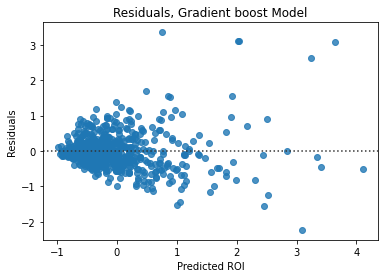

In [67]:
gradient_predictions = boost_2.predict(X_test)

sns.residplot(x = boost_2_predictions, y = y_test - boost_2_predictions)
plt.title('Residuals, Gradient boost Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

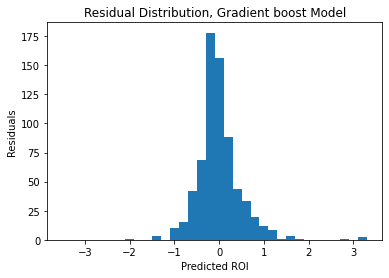

In [68]:
plt.hist(y_test - boost_2_predictions, bins = np.arange(-3.5, 3.5, 0.2))
plt.title('Residual Distribution, Gradient boost Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

I divided the result into categories, R square as Test Score, Root mean squared error as RMSE, and Mean Absolute Error as MAE. The model with the best test score result belongs to Linear Regression with 66%. This model has the lowest root mean squared error with 36% and have the slower in MAE. This is the model I selected. 


The Linear Regression has 70% accuracy. The prediction was very close to the test dataset, having a low average prediction error. Meaning the model is suitable for solving real problems. 
